In [2]:
from jqdatasdk import *
auth('13196967853','Gzx200312')

auth success 


In [3]:
import numpy as np
import pandas as pd

price=pd.read_csv("D:/Code/data/rb2501_xsge.csv")['close'].tail(60)

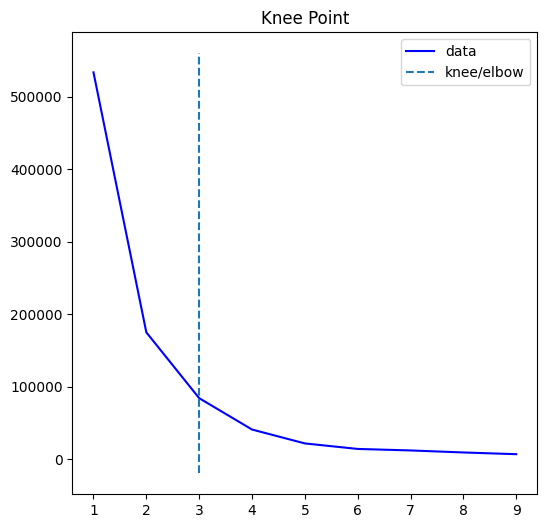

In [4]:
X = np.array(price)
from sklearn.cluster import KMeans
import numpy as np
from kneed import KneeLocator
 
sum_of_sq_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X.reshape(-1,1))
    sum_of_sq_distances.append(km.inertia_)
kn = KneeLocator(K, sum_of_sq_distances,S=1.0, curve="convex", direction="decreasing")
kn.plot_knee()

In [5]:
kmeans = KMeans(n_clusters= kn.knee).fit(X.reshape(-1,1))
c = kmeans.predict(X.reshape(-1,1))
min_and_max = []
for i in range(kn.knee):
    min_and_max.append([-np.inf,np.inf])
for i in range(len(X)):
    cluster = c[i]
    if X[i] > min_and_max[cluster][0]:
        min_and_max[cluster][0] = X[i]
    if X[i] < min_and_max[cluster][1]:
        min_and_max[cluster][1] = X[i]

In [6]:
min_and_max

[[np.float64(3726.0), np.float64(3617.0)],
 [np.float64(3608.0), np.float64(3455.0)],
 [np.float64(3829.0), np.float64(3733.0)]]

In [7]:
mam_arr=np.sort((np.array(min_and_max)).flatten())
mam_arr

array([3455., 3608., 3617., 3726., 3733., 3829.])

In [8]:
def remove_close_numbers(numbers,threshold):
    result=[numbers[0]]
    for i in range(1,len(numbers)):
        if abs(numbers[i]-result[-1]) > threshold:
            result.append(numbers[i])
    
    return result

In [10]:
sup=remove_close_numbers(mam_arr,10)
def find_closest_numbers(numbers,target,k):
        differences=[abs(number-target) for number in numbers]
        sorted_diff=sorted(zip(numbers,differences),key=lambda x:x[1])
        closet_numbers=[number for number, _ in sorted_diff[:k]]
        return closet_numbers

bi_sup=find_closest_numbers(numbers=sup,target=3600,k=2)
km_upline=bi_sup[0]
km_upline=bi_sup[1]

np.float64(3726.0)